In [1]:
%pip install transformers

   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   --------------------- ------------------ 5.5/10.0 MB 25.8 MB/s eta 0:00:01
   ------------------------------------- -- 9.4/10.0 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 19.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 27.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install tensorflow

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
    --------------------------------------- 5.0/390.2 MB 23.2 MB/s eta 0:00:17
   - -------------------------------------- 11.0/390.2 MB 26.5 MB/s eta 0:00:15
   - -------------------------------------- 16.8/390.2 MB 26.4 MB/s eta 0:00:15
   -- ------------------------------------- 22.3/390.2 MB 26.6 MB/s eta 0:00:14
   -- ------------------------------------- 28.6/390.2 MB 27.0 MB/s eta 0:00:14
   --- ------------------------------------ 34.6/390.2 MB 27.1 MB/s eta 0:00:14
   ---- ----------------------------------- 40.4/390.2 MB 27.6 MB/s eta 0:00:13
   ---- ----------------------------------- 46.7/390.2 MB 27.8 MB/s eta 0:00:13
   ----- ---------------------------------- 54.0/390.2 MB 28.7 MB/s eta 0:00:12
   ------ --------------------------------- 60.6/390.2 MB 28.8 MB/s eta 0:00:12
   ------ --------------------------------- 65.3/390.2 MB 28.3 MB/s eta 0:00:12
   ------- -------------------------------- 71.3/3

In [4]:
%pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 31.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from transformers import pipeline
from tqdm import tqdm 
tqdm.pandas()

In [11]:
corpus = pd.read_csv('media-lda-terms.csv')

In [13]:
sentiment_analyzer = pipeline('sentiment-analysis', 
                              model='nlptown/bert-base-multilingual-uncased-sentiment', 
                              device=0)

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [12]:


corpus[['sentiment', 'sentiment_confidence']] = corpus.progress_apply(
  lambda row: pd.Series(sentiment_analyzer(row['text'])[0]),
  axis=1
)

  0%|          | 0/51 [00:00<?, ?it/s]

  2%|▏         | 1/51 [00:00<00:03, 15.99it/s]


InvalidArgumentError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 512 is not in [0, 512) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1073), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1073), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

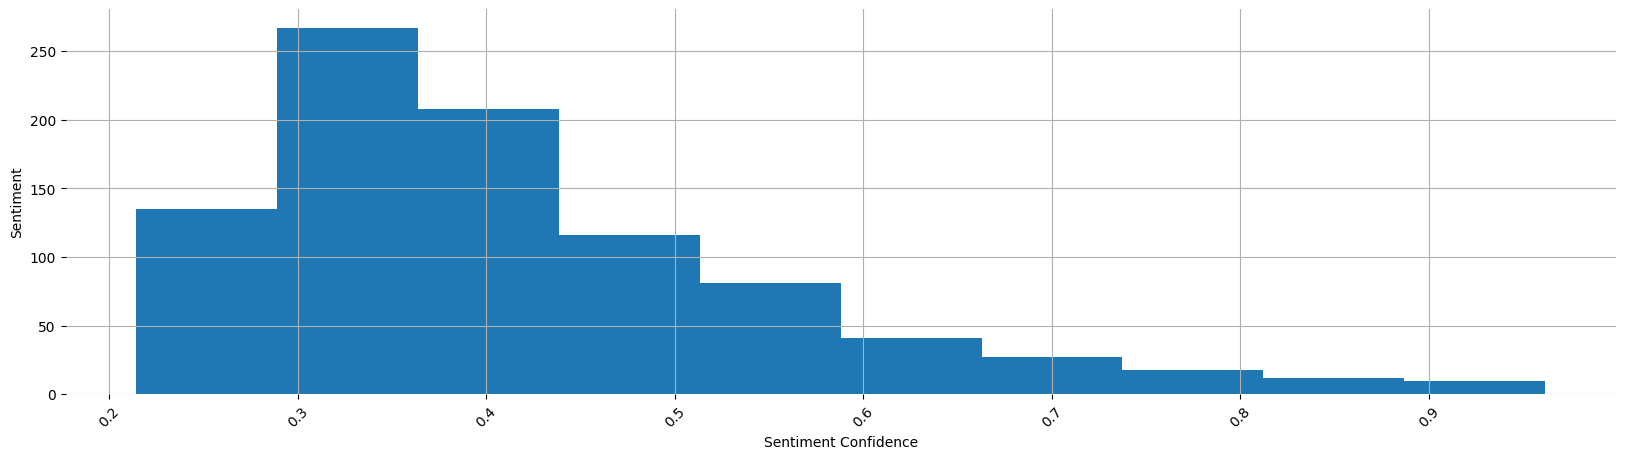

sentiment
1 star     471
3 stars    156
5 stars    133
2 stars    127
4 stars     28
Name: count, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
corpus['sentiment_confidence'].hist(ax=ax)

# Set labels
ax.set_xlabel('Sentiment Confidence')
ax.set_ylabel('Frequency')

# 45 degree angle for x-axis labels
ax.tick_params(axis='x', rotation=45)

# No spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

corpus['sentiment'].value_counts()

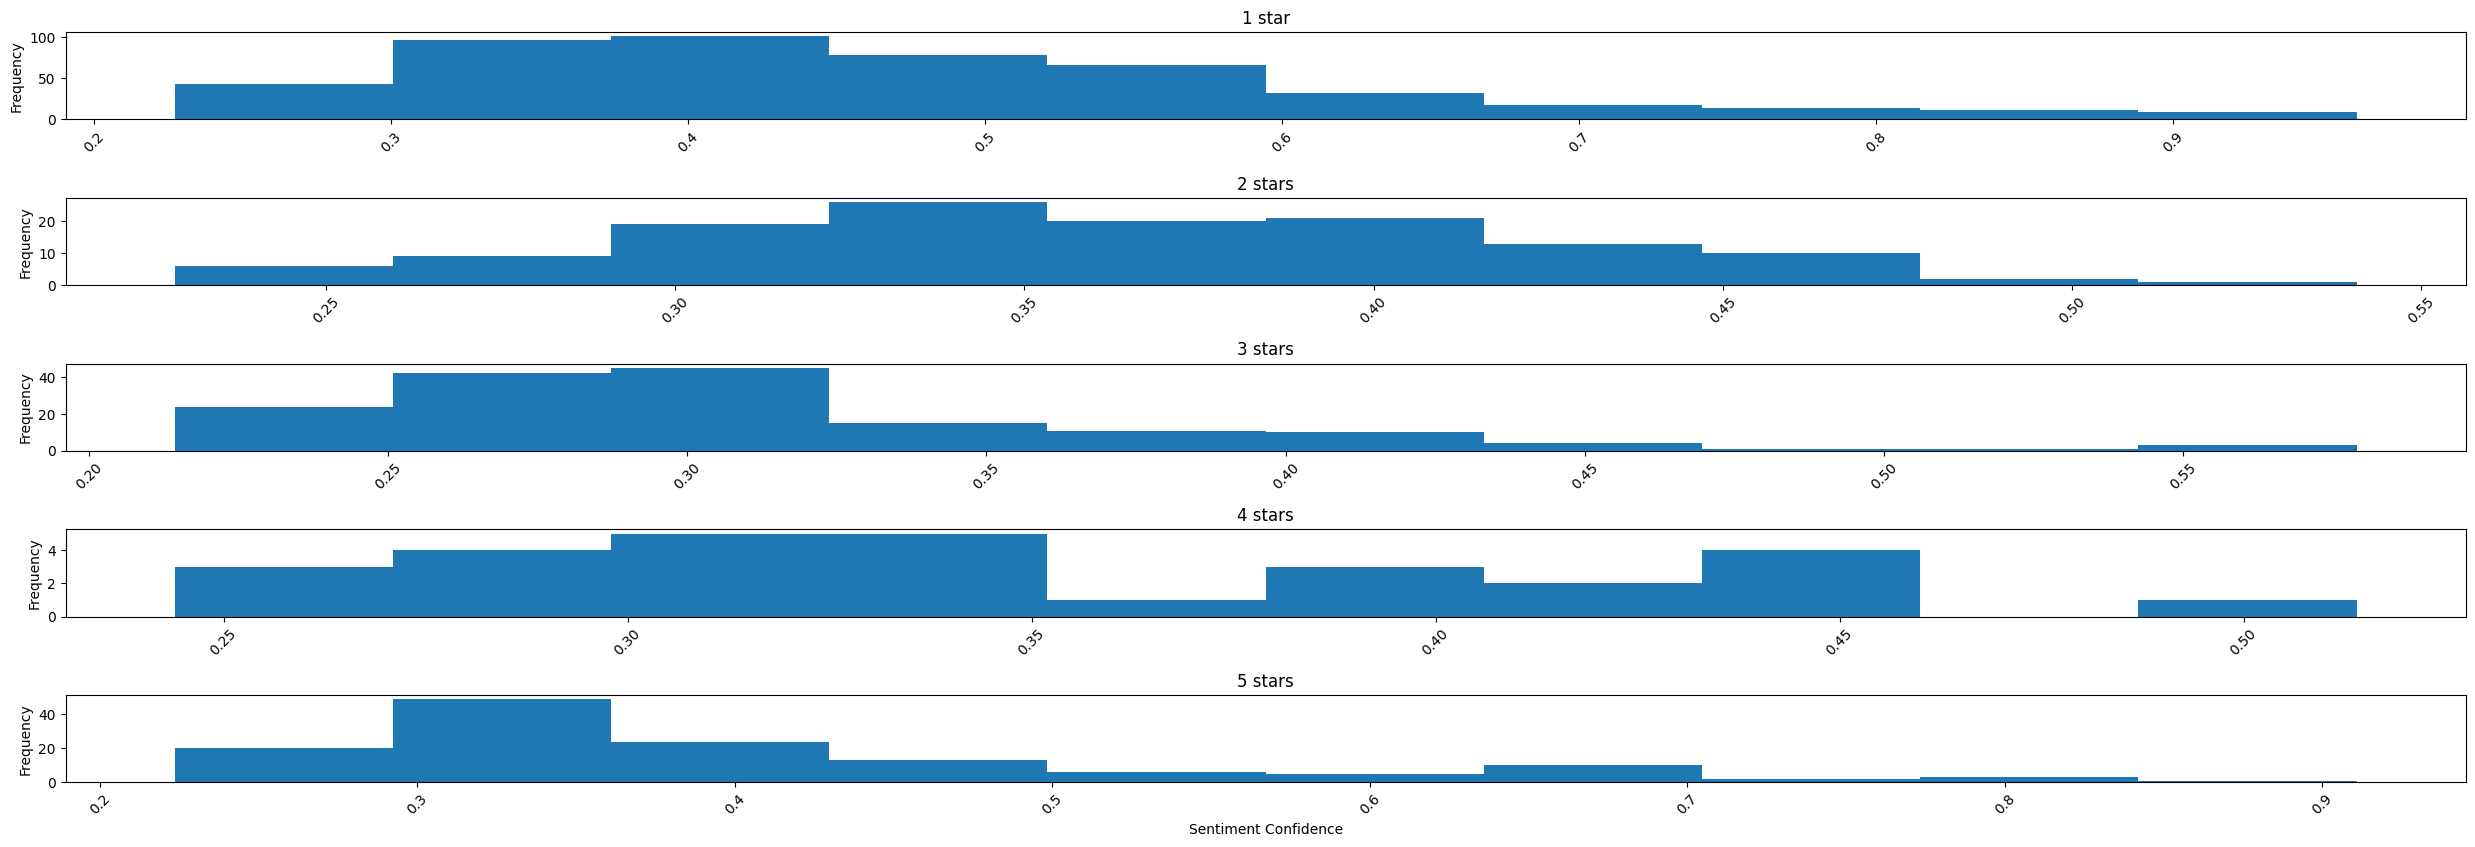

In [11]:
# Histogram of sentiment confidence along with the sentiment
fig, ax = plt.subplots(5, figsize=(30, 10))

short_comments['sentiment_confidence'].hist(
  by=short_comments['sentiment'],
  ax=ax,
)

# Add more space between subplots
plt.subplots_adjust(hspace=0.9)

# Set labels
ax[4].set_xlabel('Sentiment Confidence')
for a in ax:
  a.set_ylabel('Frequency')
  # 45 degree angle for x-axis labels
  a.tick_params(axis='x', rotation=45)

plt.show()